In [1]:
# First, import the necessary libraries
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from numpy.fft import rfft, rfftfreq

In [49]:
# Generate signal
y = pd.read_csv('D:/ITS/Tugas Akhir/data/Endaq test/bearing/1.csv',usecols = [1,2,3], header=None)
#y = y.drop(y.columns[0], axis=1, inplace=True) #hapus kolom 0 (time)

#Generate SNR
white_noise_1 = np.clip(np.random.normal(0, 1, y.shape), -0.4, 0.4) # 10
signal_energy = np.mean(y**2, axis = 0)
noise_energy = np.mean(white_noise_1**2, axis = 0)
SNR =  10*np.log10(signal_energy/noise_energy)
print(np.mean(SNR), np.max(SNR), np.min(SNR))

#y = y + white_noise_1

# simpan data hasil ekstraksi fitur fft
#y = (pd.DataFrame(y)).to_csv (r'D:/ITS/Tugas Akhir/data/Endaq test/SNR 10dB/bearing/1.csv', index = None, header=False) 

6.328563853618417 11.284876475402584 -0.35925309745123285


Text(0.5, 0, 'Time (s)')

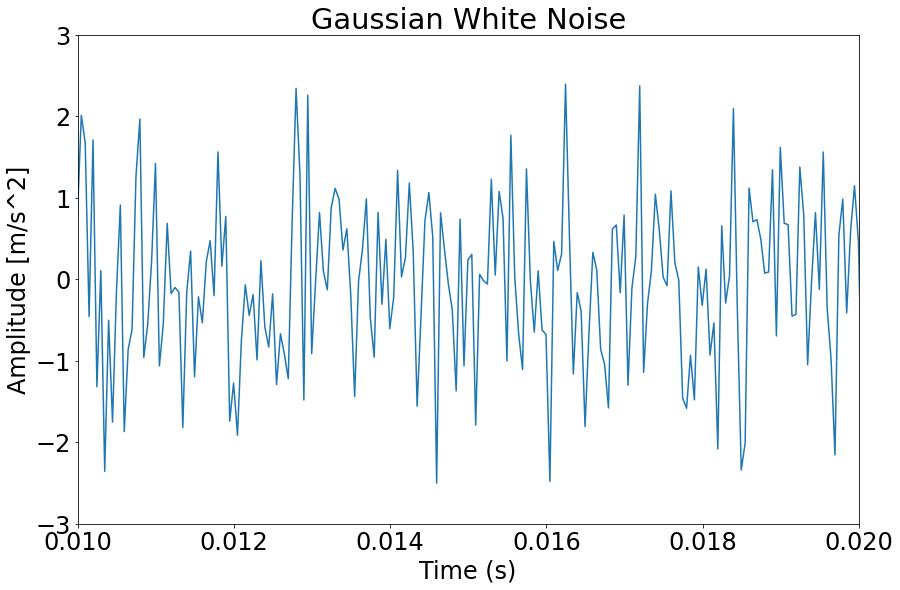

In [52]:
y = pd.read_csv('D:/ITS/Tugas Akhir/data/Endaq test/unbalance/1.csv',usecols = [3], header=None)
y=y*9.81
white_noise_1 = np.clip(np.random.normal(0, 1, y.shape), -8, 8) # 10
#white_noise_1 = np.random.normal(loc = 0, scale = 1, size = y.shape) # 10

t = 4.99 # time data in second
n=len(white_noise_1) # Length data
dt=t/n #time increment in each data
tAxis1 = np.arange(0,t,dt) # in seconds

plt.rcParams.update({'font.size' : 24})

plt.figure(figsize = (14,9))

plt.subplot(1,1,1)
plt.plot(tAxis1,white_noise_1)
plt.xlim(0.01,0.02)
plt.ylim(-3,3)
plt.ylabel('Amplitude [m/s^2]')
plt.title('Gaussian White Noise')
plt.xlabel('Time (s)')
#